 use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?

In [182]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [184]:
from pandas.io.data import DataReader

In [185]:
from datetime import datetime

In [186]:
# from __future__ import divison

In [187]:
#stock tickers of technology stock
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [188]:
end = datetime.now()
start = datetime(end.year-1,end.month, end.day)

In [189]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'google',start,end)

In [190]:
AAPL.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-08-08,107.52,108.37,107.16,108.37,28037220
2016-08-09,108.23,108.94,108.01,108.81,26315204
2016-08-10,108.71,108.90,107.76,108.00,24008505
2016-08-11,108.52,108.93,107.85,107.93,27484506
2016-08-12,107.78,108.44,107.78,108.18,18660434


In [191]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,129.290319,130.168446,128.496853,129.427211,2.961375e+07
std,16.927215,16.926998,16.776196,16.836788,1.387888e+07
min,102.650000,105.720000,102.530000,103.130000,1.147592e+07
25%,113.430000,114.270000,112.500000,113.420000,2.143903e+07
50%,129.130000,130.500000,128.900000,130.290000,2.600972e+07
75%,144.255000,145.045000,143.375000,144.150000,3.330051e+07
max,159.280000,159.750000,156.160000,157.140000,1.123403e+08


In [192]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-08-08 to 2017-08-04
Data columns (total 5 columns):
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


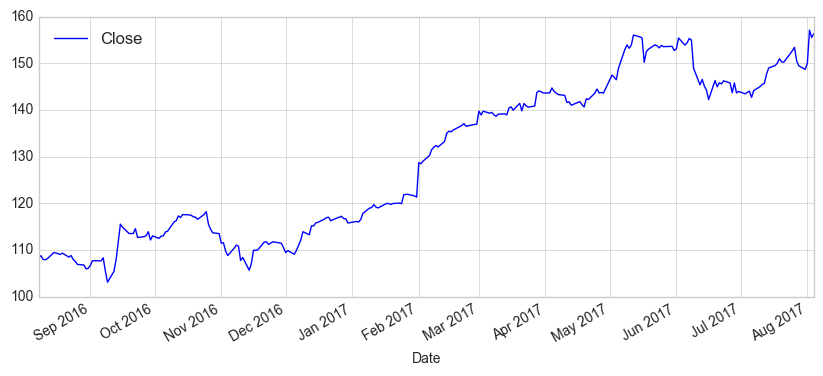

In [193]:
AAPL['Close'].plot(legend=True,figsize=(10,4))

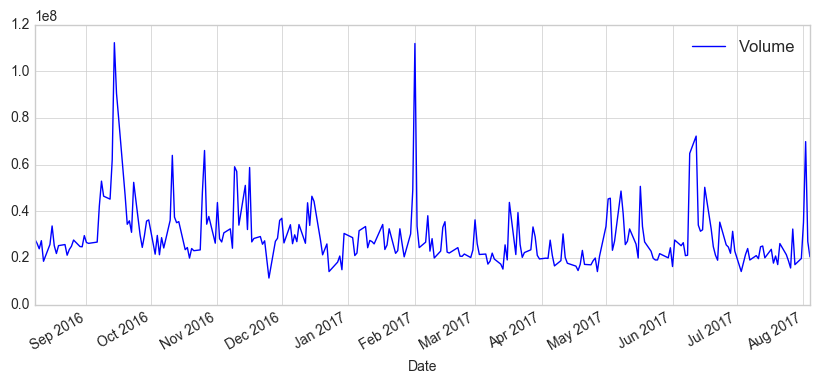

In [194]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [195]:
#Moving average
ma_day = [10,20,50]
for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Close'],ma)

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()


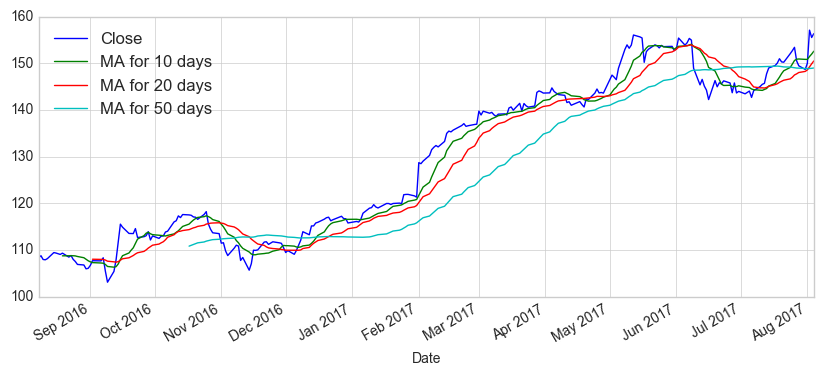

In [196]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

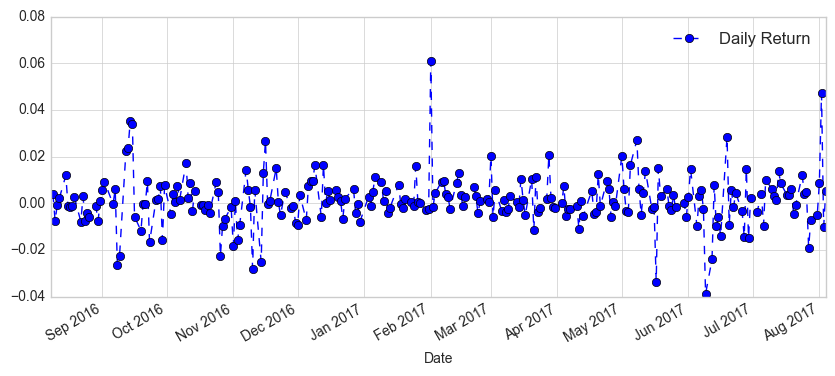

In [197]:
AAPL['Daily Return']=AAPL['Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\rohan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


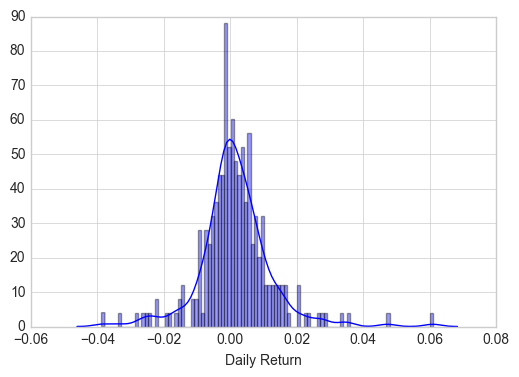

In [198]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue')

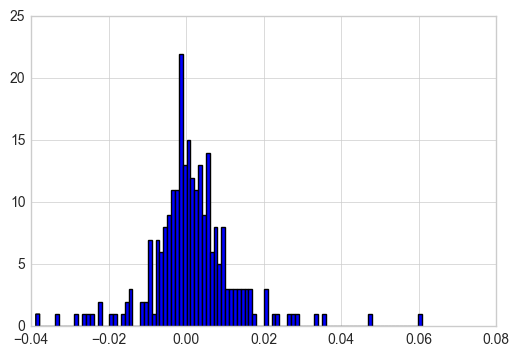

In [199]:
AAPL['Daily Return'].hist(bins=100)

In [200]:
closing_df = DataReader(tech_list,'google',start,end)['Close']

In [201]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-08-08,108.37,766.56,781.76,58.06
2016-08-09,108.81,768.31,784.26,58.20
2016-08-10,108.00,768.56,784.68,58.02
2016-08-11,107.93,771.24,784.85,58.30
2016-08-12,108.18,772.56,783.22,57.94


In [202]:
tech_rets= closing_df.pct_change()

In [203]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-08-08,NaN,NaN,NaN,NaN
2016-08-09,0.004060,0.002283,0.003198,0.002411
2016-08-10,-0.007444,0.000325,0.000536,-0.003093
2016-08-11,-0.000648,0.003487,0.000217,0.004826
2016-08-12,0.002316,0.001712,-0.002077,-0.006175


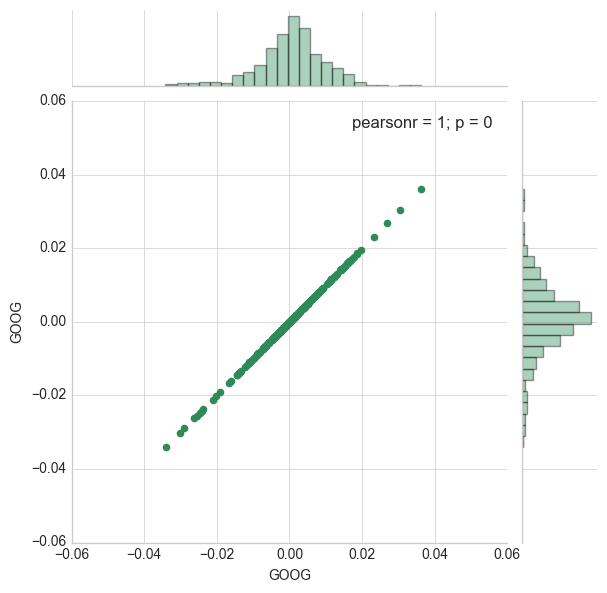

In [204]:
#how they are correlated
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

Linear correlation between google and google as same stock

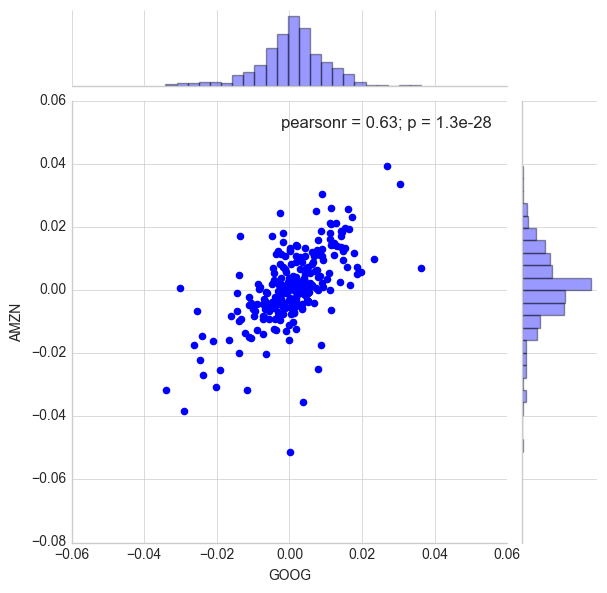

In [205]:
#different stocks
sns.jointplot('GOOG','AMZN',tech_rets,kind='scatter')

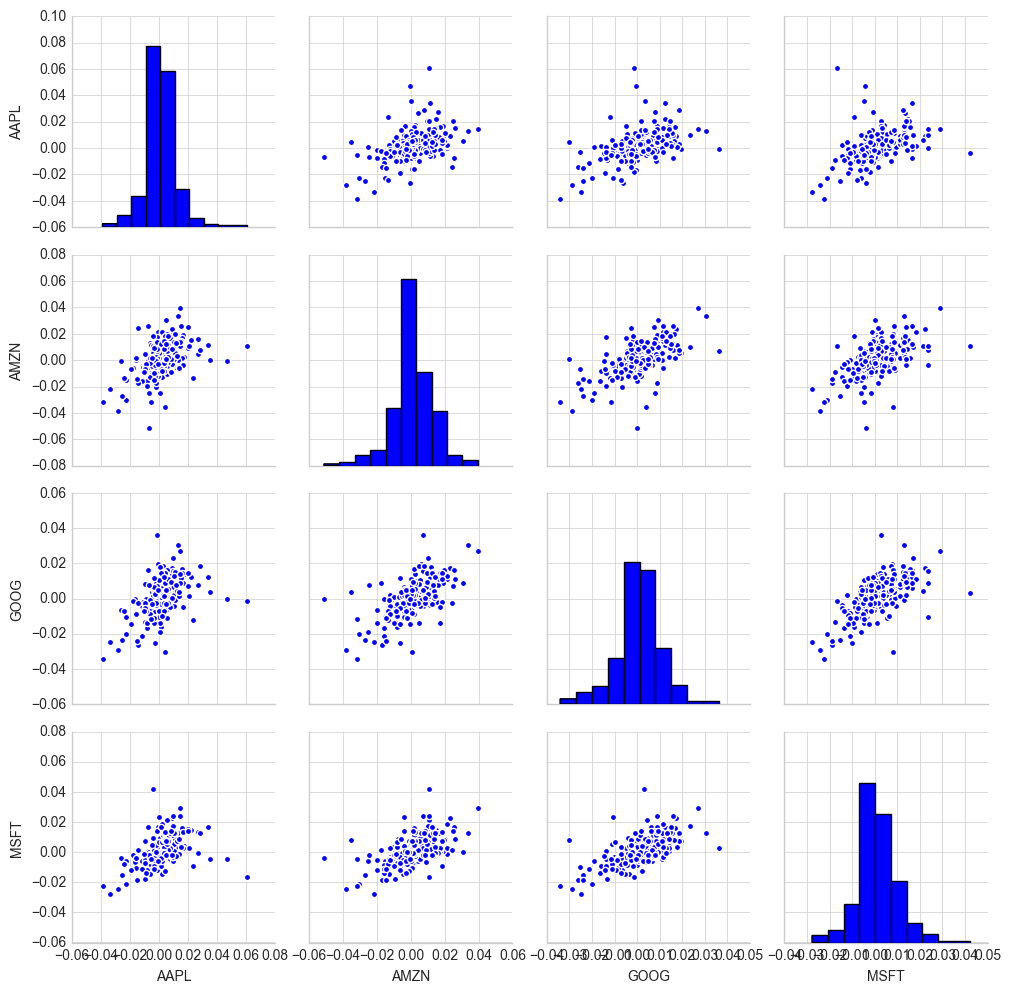

In [206]:
#pairplot
sns.pairplot(tech_rets.dropna())

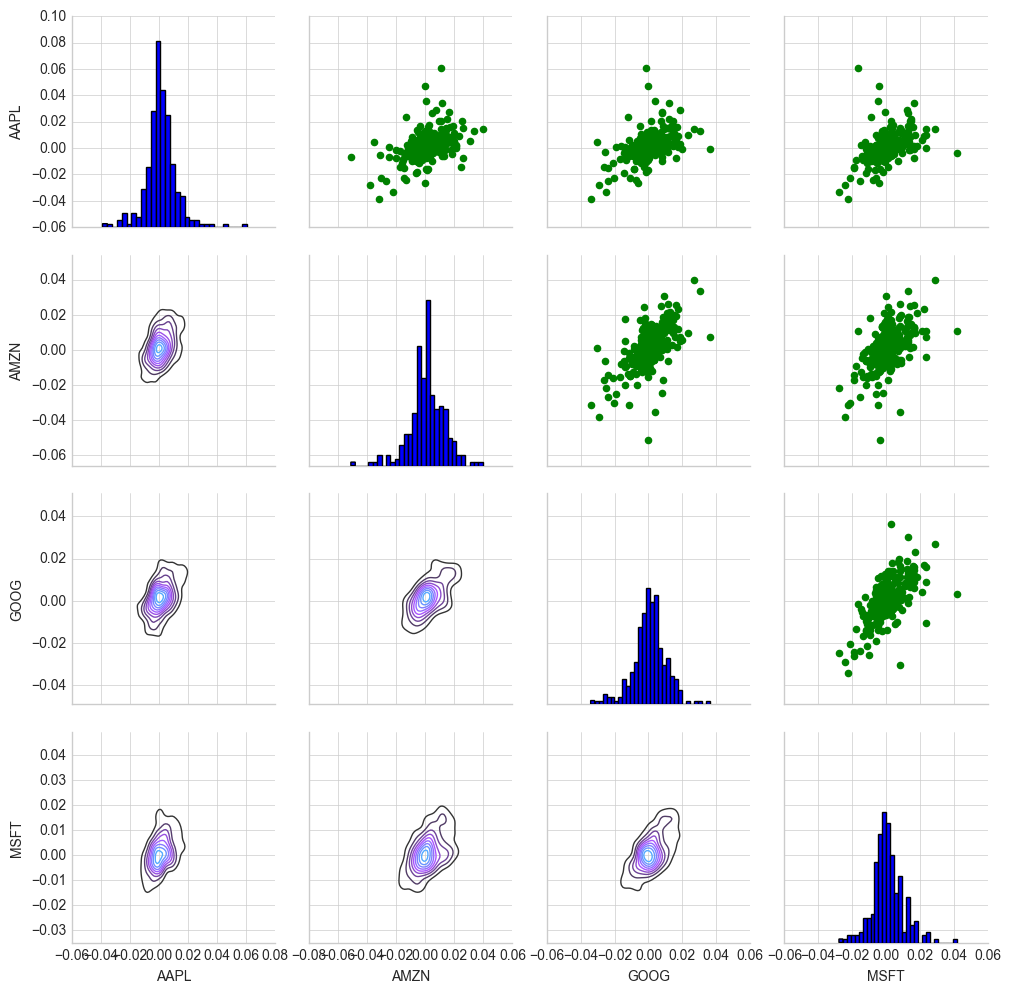

In [207]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='green')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

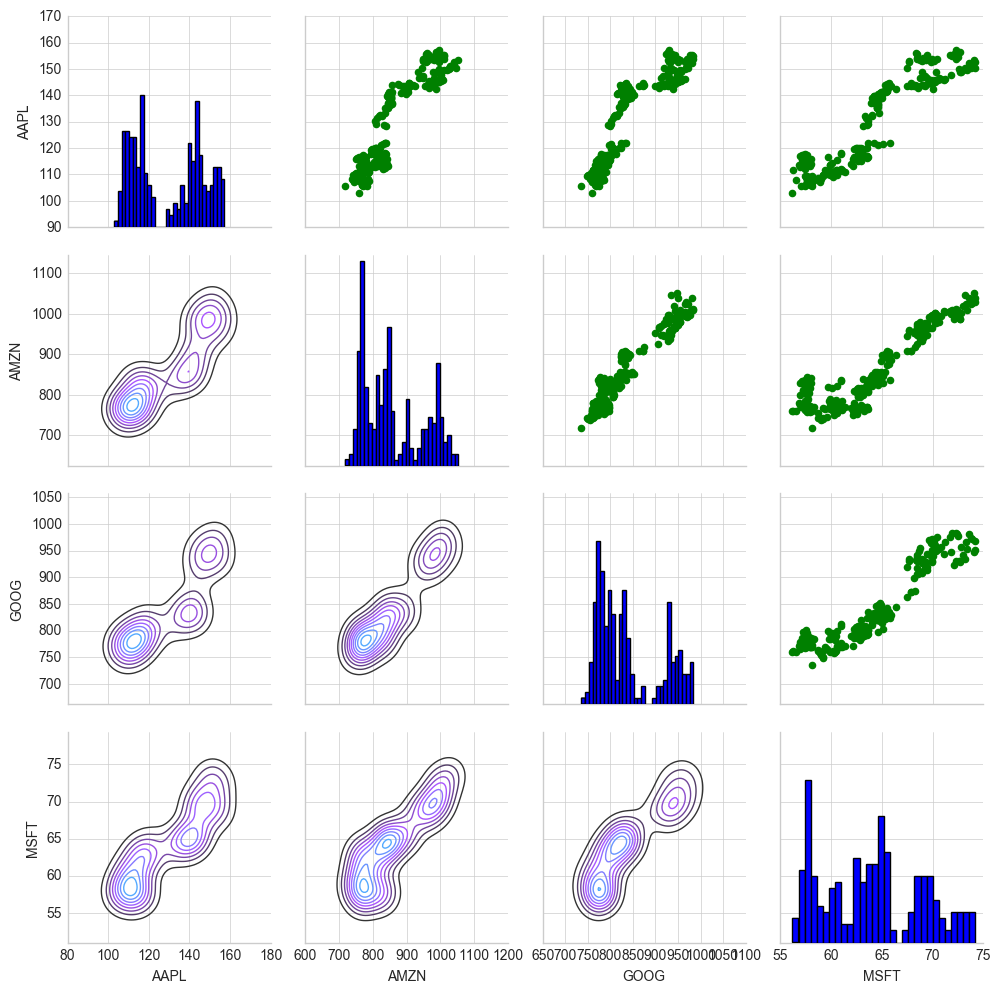

In [208]:
#correlation between clossing prices
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='green')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

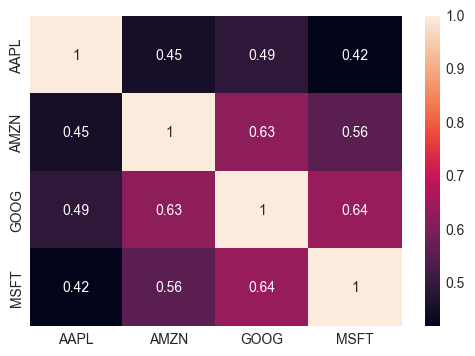

In [209]:
#correlation
sns.heatmap(tech_rets.corr(),annot=True)

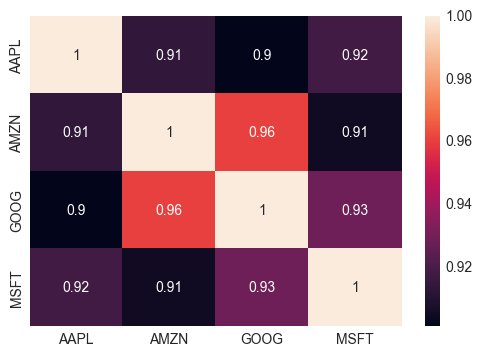

In [210]:
sns.heatmap(closing_df.corr(),annot=True)

In [211]:
#Risk Analysis
rets = tech_rets.dropna()

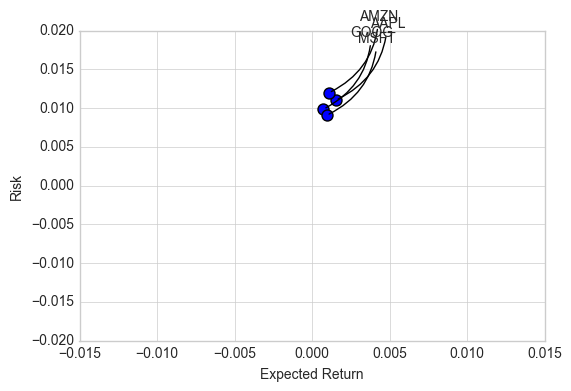

In [220]:
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.ylim(-0.02,0.02)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

C:\Users\rohan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


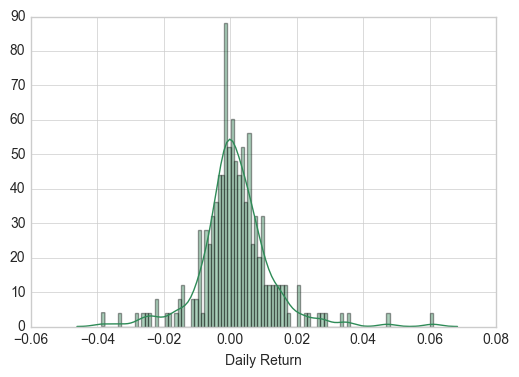

In [222]:
#Value at Risks- Monte Carlo
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='seagreen')

In [223]:
rets.head()


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-08-09,0.004060,0.002283,0.003198,0.002411
2016-08-10,-0.007444,0.000325,0.000536,-0.003093
2016-08-11,-0.000648,0.003487,0.000217,0.004826
2016-08-12,0.002316,0.001712,-0.002077,-0.006175
2016-08-15,0.012017,-0.005268,-0.000996,0.003107


In [228]:
#value at risk. at worst we loose 1.5%. 95%confidence. So for 1 million $ investment we loose 15000 at a given day for apple stock
rets['AAPL'].quantile(0.05)

-0.015177658069406259

C:\Users\rohan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


-0.015384278814824258

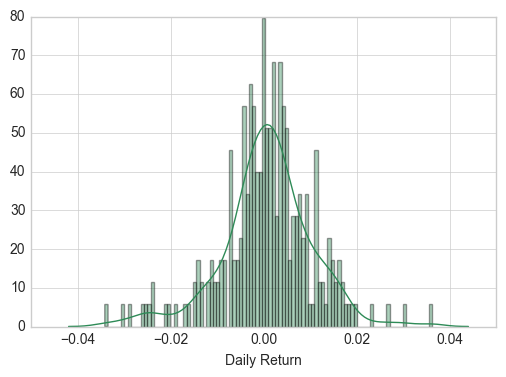

In [231]:
#Value at risk GOOG
GOOG['Daily Return']=GOOG['Close'].pct_change()
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='seagreen')
rets['GOOG'].quantile(0.05)

C:\Users\rohan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


-0.017372073765174051

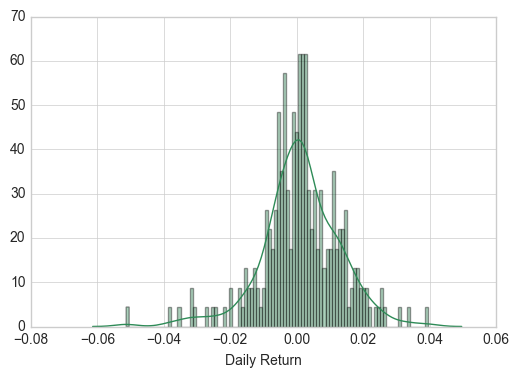

In [234]:
#Value at risk AMZN
AMZN['Daily Return']=AMZN['Close'].pct_change()
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='seagreen')
rets['AMZN'].quantile(0.05)

C:\Users\rohan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


-0.012968945213901521

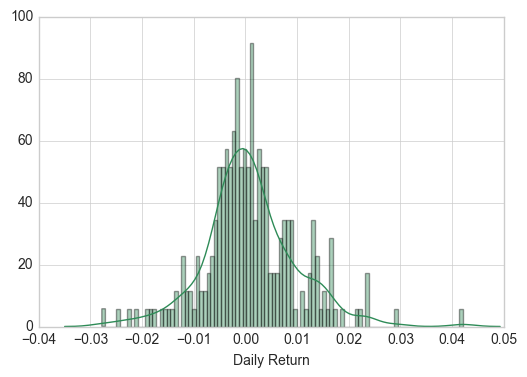

In [236]:
#Value at risk GOOG
MSFT['Daily Return']=MSFT['Close'].pct_change()
sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='seagreen')
rets['MSFT'].quantile(0.05)